In [1]:
import numpy as np
import pandas as pd
import scipy
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
raw_data = pd.read_csv('https://tf-assets-prod.s3.amazonaws.com/tf-curric/data-science/epi_r.csv')

In [3]:
list(raw_data.columns)

['title',
 'rating',
 'calories',
 'protein',
 'fat',
 'sodium',
 '#cakeweek',
 '#wasteless',
 '22-minute meals',
 '3-ingredient recipes',
 '30 days of groceries',
 'advance prep required',
 'alabama',
 'alaska',
 'alcoholic',
 'almond',
 'amaretto',
 'anchovy',
 'anise',
 'anniversary',
 'anthony bourdain',
 'aperitif',
 'appetizer',
 'apple',
 'apple juice',
 'apricot',
 'arizona',
 'artichoke',
 'arugula',
 'asian pear',
 'asparagus',
 'aspen',
 'atlanta',
 'australia',
 'avocado',
 'back to school',
 'backyard bbq',
 'bacon',
 'bake',
 'banana',
 'barley',
 'basil',
 'bass',
 'bastille day',
 'bean',
 'beef',
 'beef rib',
 'beef shank',
 'beef tenderloin',
 'beer',
 'beet',
 'bell pepper',
 'berry',
 'beverly hills',
 'birthday',
 'biscuit',
 'bitters',
 'blackberry',
 'blender',
 'blue cheese',
 'blueberry',
 'boil',
 'bok choy',
 'bon appétit',
 'bon app��tit',
 'boston',
 'bourbon',
 'braise',
 'bran',
 'brandy',
 'bread',
 'breadcrumbs',
 'breakfast',
 'brie',
 'brine',
 'brisk

In [4]:
original_df = raw_data
df = raw_data

In [5]:
df['rating'].unique()

array([2.5  , 4.375, 3.75 , 5.   , 3.125, 1.875, 0.   , 1.25 ])

Looks like we can make this one categorical if necessary. At this moment I am still not sure what the target will be or what the assignment will be


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20052 entries, 0 to 20051
Columns: 680 entries, title to turkey
dtypes: float64(679), object(1)
memory usage: 104.0+ MB


In [10]:
df.describe()

,rating,calories,protein,fat,sodium,#cakeweek,#wasteless,22-minute meals,3-ingredient recipes,30 days of groceries,...,yellow squash,yogurt,yonkers,yuca,zucchini,cookbooks,leftovers,snack,snack week,turkey
count,20052.000000,1.593500e+04,15890.000000,1.586900e+04,1.593300e+04,20052.000000,20052.000000,20052.000000,20052.000000,20052.000000,...,20052.000000,20052.000000,20052.000000,20052.000000,20052.000000,20052.000000,20052.000000,20052.000000,20052.000000,20052.000000
mean,3.714467,6.322958e+03,100.160793,3.468775e+02,6.225975e+03,0.000299,0.000050,0.000848,0.001346,0.000349,...,0.001247,0.026332,0.000050,0.000299,0.014861,0.000150,0.000349,0.001396,0.000948,0.022741
std,1.340829,3.590460e+05,3840.318527,2.045611e+04,3.333182e+05,0.017296,0.007062,0.029105,0.036671,0.018681,...,0.035288,0.160123,0.007062,0.017296,0.121001,0.012231,0.018681,0.037343,0.030768,0.149080
min,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.750000,1.980000e+02,3.000000,7.000000e+00,8.000000e+01,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,4.375000,3.310000e+02,8.000000,1.700000e+01,2.940000e+02,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,4.375000,5.860000e+02,27.000000,3.300000e+01,7.110000e+02,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,5.000000,3.011122e+07,236489.000000,1.722763e+06,2.767511e+07,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [11]:
df.dtypes

title                     object
rating                   float64
calories                 float64
protein                  float64
fat                      float64
sodium                   float64
#cakeweek                float64
#wasteless               float64
22-minute meals          float64
3-ingredient recipes     float64
30 days of groceries     float64
advance prep required    float64
alabama                  float64
alaska                   float64
alcoholic                float64
almond                   float64
amaretto                 float64
anchovy                  float64
anise                    float64
anniversary              float64
anthony bourdain         float64
aperitif                 float64
appetizer                float64
apple                    float64
apple juice              float64
apricot                  float64
arizona                  float64
artichoke                float64
arugula                  float64
asian pear               float64
          

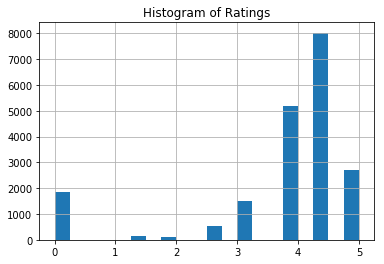

In [12]:
df['rating'].hist(bins = 20)
plt.title('Histogram of Ratings')
plt.show()

In [13]:
df.isnull().sum()

title                       0
rating                      0
calories                 4117
protein                  4162
fat                      4183
sodium                   4119
#cakeweek                   0
#wasteless                  0
22-minute meals             0
3-ingredient recipes        0
30 days of groceries        0
advance prep required       0
alabama                     0
alaska                      0
alcoholic                   0
almond                      0
amaretto                    0
anchovy                     0
anise                       0
anniversary                 0
anthony bourdain            0
aperitif                    0
appetizer                   0
apple                       0
apple juice                 0
apricot                     0
arizona                     0
artichoke                   0
arugula                     0
asian pear                  0
                         ... 
walnut                      0
wasabi                      0
washington

In [14]:
null_count = df.isnull().sum()
null_count[null_count > 0]
#This method is much simpler then a for loop

calories    4117
protein     4162
fat         4183
sodium      4119
dtype: int64

In [15]:
from sklearn.svm import SVR
svr = SVR()
X = df.drop(['rating', 'title', 'calories', 'protein', 'fat', 'sodium'],
            1).sample(frac = 0.3, replace = True, random_state = 1)
Y = df.rating.sample(frac = .3, replace = True, random_state = 1)
svr.fit(X,Y)

F:\Anaconda\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1,
    gamma='auto_deprecated', kernel='rbf', max_iter=-1, shrinking=True,
    tol=0.001, verbose=False)

Now it seems like the way to make it a binary classifier is to make a middle line and say everything to the left is the bad category and everything to its right is the good category.  So I would need to make a new column where I say if rating is less then a certain value then make the value in that column 0, if the rating is above or equal to a certain value then the value of the new column should be 1. After this I now have targets to do some learning with. 